# **Introduction**

Bellabeat is a high-tech manufacturer of health-focused products for women. It has the potential to become a larger player in the global smart device market. By collecting data on activity, sleep, stress, and reproductive health, Bellabeat empowers women with
knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly, positioning itself as a tech-driven wellness company for women. By 2016, Bellabeat had opened offices around the world and launched multiple products. 

Urška Sršen and Sando Mur, the founders of BellaBeat, believe that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. 

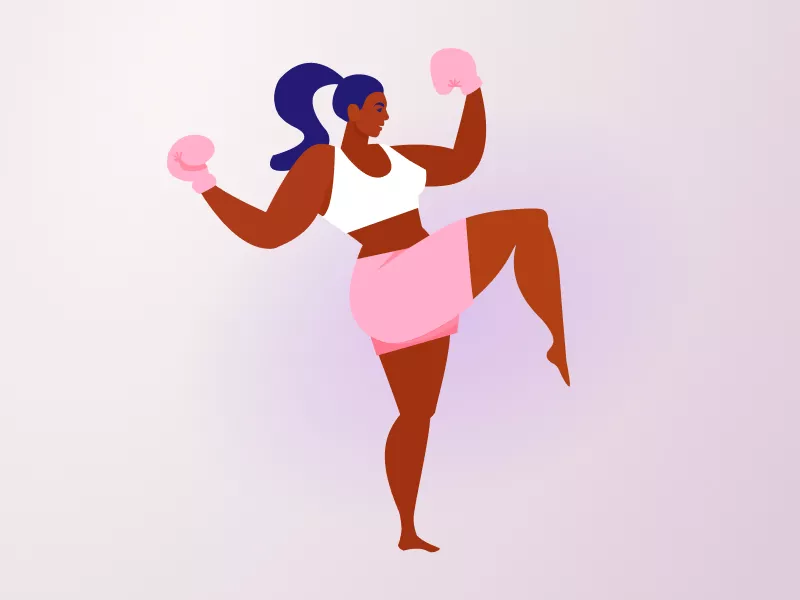

# **Ask Phase**

#### Key Stakeholders:

1.  Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2.  Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
3.  Bellabeat Marketing Analytics Team: A team of data analysts 



#### Business Task

The aim of this case study is to analyze constumers' smart device usage data in order to determine usage trends and improve BellaBeat's marketing strategy. These questions will guide the analysis:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?








# **Prepare Phase**

**1. Data Source:** FitBit Fitness Tracker Data (CC0: Public Domain, made available through Kaggle user Mobius) will be used for this study.

**2. Content and Privacy:** This dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

**3. Data Organization:** The dataset is a collection of 18 .csv files: 15 in long format, 3 in wide format. 

**4. Data Limitations:**

* Small Sample Size: Thirty Fitbit user participants are not enough to draw conclusions on the wider Fitbit user population.
* Missing Information: Certain demographics, such as age and gender should have been included in the survey. Categorizing the participants based on their demographics leads to more specific and accurate insights.





# **Process Phase**

R programming language (RStudio Cloud) will be used for data cleaning, analysis, and visualization.

#### Installing packages and loading libraries:

In [ ]:
install.packages("tidyverse")
library("tidyverse")
library("lubridate")
library("dplyr")
library("ggplot2")

#### Reading the data sets

In [ ]:

daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

minute_calories_narrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minute_calories_wide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minute_intensities_narrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minute_intensities_wide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minute_mets <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minute_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minute_steps_narrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minute_steps_wide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")

heartrate_seconds <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight_log_info <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


#### Inspecting the daily data sets:

In [ ]:
# Datasets used: daily_activity, daily_calories, daily_intensities, daily_step, and daily_sleep

colnames(daily_activity)
colnames(daily_calories)
colnames(daily_intensities)
colnames(daily_steps)
colnames(daily_sleep)

dim(daily_activity)
dim(daily_calories)
dim(daily_intensities)
dim(daily_steps)
dim(daily_sleep)

# Previewing the data sets using the head() function:

head(daily_activity)
head(daily_calories)
head(daily_intensities)
head(daily_steps)
head(daily_sleep)

# Inspecting the disitnct Id's in each of the five dataframes:

n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_intensities$Id)
n_distinct(daily_steps$Id)
n_distinct(daily_sleep$Id)

#### Inspecting the hourly data sets:

In [ ]:
# Datasets used: hourly_calories, hourly_intensities, and hourly_steps

colnames(hourly_calories)
colnames(hourly_intensities)
colnames(hourly_steps)

dim(hourly_calories)
dim(hourly_intensities)
dim(hourly_steps)

# Previewing the three datasets using the head() function:

head(hourly_calories)
head(hourly_intensities)
head(hourly_steps)

# Inspecting the distinct Id's in each of the three dataframes:

n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)

#### Inspecting the remaining nine datasets:

In [ ]:
head(minute_calories_narrow)
head(minute_calories_wide)
head(minute_intensities_narrow)
head(minute_intensities_wide)
head(minute_steps_narrow)
head(minute_steps_wide)
head(heartrate_seconds)
head(minute_mets)
head(minute_sleep)
head(weight_log_info)

> ##### The above nine datasets will not be used in the analysis since:
> * Some of them are too small to give measurable and action-oriented insights.
> * Some are in the minute-level and second-level output.

#### Transforming daily data sets

At first glance, we notice that the daily_activity data set contains the information of the other daily data sets except daily_sleep. We decide to merge daily_activity and daily_sleep in one data frame.

In [ ]:
daily_data <- merge(daily_activity, daily_sleep, by="Id")

#### Transforming hourly data sets

We decide to merge the hourly data sets into one.

In [ ]:
dataframe <- merge(hourly_calories, hourly_intensities)
hourly_data <- merge(dataframe, hourly_steps)

#### Checking for Missing Values

In [ ]:
sum(is.na(hourly_data))
sum(is.na(daily_data))

#### Removing Duplicates

In [ ]:
# Looking for duplicates

sum(duplicated(hourly_data))
sum(duplicated(daily_data))

# Droping duplicates
daily_data <- daily_data %>%
  distinct() %>%
  drop_na()

hourly_data <-hourly_data %>%
  distinct() %>%
  drop_na()

#### Formatting Date and Time

In [ ]:
# Formatting daily_data dates

daily_data$ActivityDate=as.POSIXct(daily_data$ActivityDate, format = "%Y-%m-%d",tz = Sys.timezone())
daily_data$SleepDay=as.POSIXct(daily_data$SleepDay, format = "%Y-%m-%d",tz = Sys.timezone())

# Obtaining weekday from date

daily_data <- daily_data %>% 
  mutate(Weekday = format(ymd(ActivityDate), format = '%a')) %>%
  mutate(Weekday = factor(Weekday, level = c('Mon', 'Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun')))

# Formatting hourly_data dates

hourly_data$ActivityHour=as.POSIXct(hourly_data$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_data$time <- format(hourly_data$ActivityHour, format = "%H:%M:%S")
hourly_data$date <- format(hourly_data$ActivityHour, format = "%m/%d/%y")
  

# **Analyze and Share Phases**

#### Line graph showing the relationship between the total steps and the calories burnt:

In [ ]:
ggplot(data=daily_data) + 
  geom_smooth(mapping=aes(x=TotalSteps, y=Calories, color = Id), color='green') +
  geom_point(mapping=aes(x=TotalSteps, y=Calories, color = Id)) +
  labs(title='Calories vs. Total Steps')

> **Observations:**
    
    > Unsurprisingly, there is a positive correlation between the total number of steps taken by an individual and the calories burnt. The more active we are, the more calories we burn.

Now, let's examine users' activity intensities.

#### Bar graph showing the Average Activity Minutes by Intensity

In [ ]:
mean_sed <- mean(daily_data$SedentaryMinutes)
mean_lightly <- mean(daily_data$LightlyActiveMinutes)
mean_fairly <- mean(daily_data$FairlyActiveMinutes)
mean_very <- mean(daily_data$VeryActiveMinutes)


mean_activity_min <- c(mean_sed,mean_lightly,mean_fairly,mean_very)
activity_intensity <- c("Sedentary","Lightly","Fairly", "Very Active")
intensity_min <- data.frame(mean_activity_min, activity_intensity)

ggplot(data = intensity_min) + 
  geom_col(aes(x = activity_intensity, y = mean_activity_min, fill=activity_intensity)) +
  labs(title = 'Average Minutes by Intensity', x = 'Activity Intensity', y = 'Average Activity Minutes') 

> **Observations:**
    
    > Users spend the most time being sedentary. Further research needs to be conducted to know the causes.

#### Histogram showing the average total intensity per time

In [ ]:
int_new <- hourly_data %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='thistle') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")
  

> **Observations:**
    
    > Users are the most active between 6am and 8pm. 

#### Line graph showing the total minutes of sleep of an individual per weekday

ggplot(data=daily_data) +
  geom_point(mapping=aes(x=Weekday, y=TotalMinutesAsleep)) +
  labs(title="Sleep Minutes per Weekday")

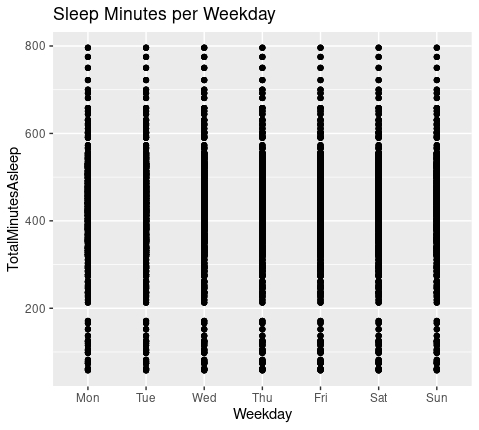

> **Observations:**
    
    > The total number of sleep minutes is pretty much the same during all weekdays even if the number of steps varies across those days.

Let's inspect futher users' sleep patterns by finding a correlation between their total minutes of sleeps and their total time in bed.

#### Line graph showing the variation of the total minutes of sleep of an individual as a functions of the total time in bed

In [ ]:
ggplot(data=daily_data)+
  geom_point(mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed, color="red")) + 
  labs(title="Total Minutes Asleep vs. Total Time in Bed")

> **Observations:**
    
    > There exists a linear relationship between the TotalTimeInBed and the TotalMinutesAsleep.

#### Line graph showing the variation of the total minutes of sleep of an individual as a functions of the sedentary minutes

In [ ]:
ggplot(daily_data, mapping = aes(x = SedentaryMinutes, y = TotalMinutesAsleep)) + 
  geom_point() + 
  geom_point(color="deeppink") +
  geom_smooth(method = lm)
  labs(title="Sedentary Minutes vs. Total Minutes Asleep")

> **Observations:**
    
    > There exists a negative relationship between the SedentaryMinutes and the TotalMinutesAsleep. The more time users spend sedentary, the less minutes of sleep they receive.

# **Act Phase/Recommendations**

Bellabeat is company that focuses on women's health and well-being, so we shall move cautiously with the recommendations. Given that the sample size is around 30 users, we cannot draw several insightful conclusions. Therefore, my strongest suggestion would be to collect more reliable and specific data about Fitbit users and specify demographics, such as gender, age, and health status.  

*After analyzing the given FitBit Fitness Tracker data, I would recommend the following to **improve Bellabeat's marketing strategy**:*

#### Viz 1, 2, & 3: 

* Since activity influences the amount of calories burned and users spend more time being sedentary than active, sending **motivational notifications** to users would remind them to exercise. According to the hourly intensity histogram, it appears that users are full-time workers. Bellabeat could first target this group in its marketing strategy by suggesting the type of activity based on the hour of the day. For example, at around 1pm-3pm, during lunch break, the reminder could be to go for a small walk or stretch. After work hours, the reminder could be to go to the gym.


#### Viz 4, 5, & 6: 

* Users' sleeping patterns are constant throughout the week. However, whenever they are sedentary, they tend to sleep less. If we implement the recommendation above, users might become more active, and this might help them sleep more. Also, since they are spending time in bed but no actually sleeping, Bellabeat could send **sleep notifications** to remind them to sleep. 

# **Credits/Sources**

This is my first data analytics project (and first go at R programming), so I'd like to thank the following authors who have given me clarity:

* https://www.kaggle.com/code/chebotinaa/bellabeat-case-study-with-r/notebook
* https://www.kaggle.com/code/alexzixinhan/health-product-bellabeat-data-analysis-in-r
* https://www.kaggle.com/code/kathrynspuur/bellabeat-case-study-excel-sql-r/notebook
* Pictures taken from Bellabeat official website: https://bellabeat.com/ 

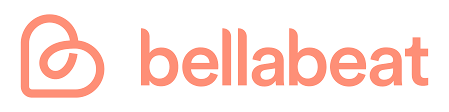